# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

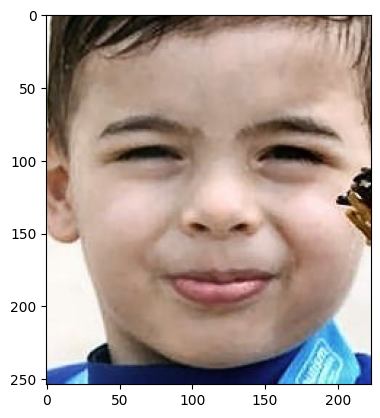

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

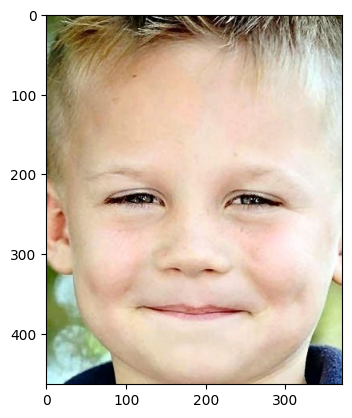

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image_path in list_of_images:
        # Read and resize the image
        img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (224, 224), interpolation=cv2.INTER_CUBIC)
        
        if 'Non_Autistic' in image_path:
            y.append(0)
        else:
            y.append(1)
            
    return X, y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

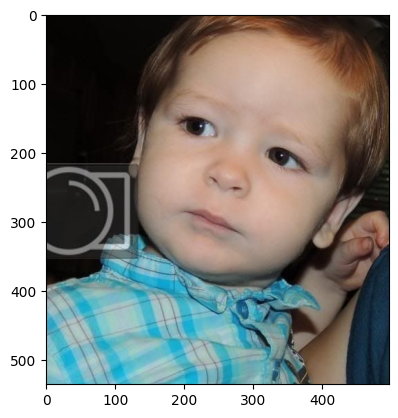

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Preprocessing 

In [13]:
def preprocess_image(train_data, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Normalize pixel values
    image = image / 255.0
    
    return image

X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]


# Converting Train & Val Data To np Array


In [14]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Data Augmentation

In [15]:
# Generating Larger DataSet
## Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [16]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_val_features.append(extract_features(model, X_val))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_val_features_std = scaler.transform(X_val_features)
X_test_features_std = scaler.transform(X_test_features)






1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 160ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 129ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 44ms/step


# ANOVA Analysis

In [114]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')

X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)
X_val_selected = k_best.transform(X_val_features_std)

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


# Adaboost

In [115]:
# !pip install xgboost


In [116]:
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have X_train_features_std, X_val_features_std, y_train, y_val from previous code

# Create a logistic regression model (as the base learner)

# Create a logistic regression model (as the base learner)
base_classifier = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

# Create an XGBoost classifier using logistic regression as the base learner
# xgb_classifier = xgb.XGBClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Create an AdaBoostClassifier using the logistic regression model as the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, algorithm='SAMME', n_estimators=10, random_state=42)


In [117]:
# Train the boosting model
adaboost_classifier.fit(X_train_selected, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(kernel='linear', probability=True,
                                 random_state=42),
                   n_estimators=10, random_state=42)

In [118]:
# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_val_selected)

# Evaluate performance
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy*100)

Validation Accuracy: 83.0


In [119]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Test Accuracy:", accuracy * 100)
print("Test Precision:", precision * 100)
print("Test Recall:", recall * 100)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.88
Precision: 0.8851351351351351
Recall: 0.8733333333333333
Test Accuracy: 88.0
Test Precision: 88.51351351351352
Test Recall: 87.33333333333333
Confusion Matrix:
[[133  17]
 [ 19 131]]


# Memory Release

In [25]:
import gc

In [45]:
# del X_train_features, X_val_features, X_train, X_val
# gc.collect()  

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")